# Automation of Steel Beam Calculations (Steel Design)

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Defining W-Shape Members

In [2]:
w_shapes = pd.DataFrame({
    'Shape': ['W8x31', 'W10x45', 'W12x50', 'W14x61', 'W16x67'],
    'Area (in²)': [9.13, 13.3, 14.6, 17.9, 19.7],
    'Depth (in)': [8.0, 10.1, 12.2, 13.9, 16.3]})

### W-shape Tensile Strength

In [3]:
# Load some sample W-shape data
def calculate_tensile_strength(shape, Fy=50, Fu=65):
    shape_data = w_shapes[w_shapes['Shape'] == shape].iloc[0]
    Ag = shape_data['Area (in²)']
    
    # Calculate strengths (simplified - actual AISC has more factors)
    Pn_yielding = Fy * Ag
    Pn_rupture = Fu * Ag * 0.75  # Simplified rupture calculation
    
    return {
        'Shape': shape,
        'Yielding Strength (kips)': round(Pn_yielding, 2),
        'Rupture Strength (kips)': round(Pn_rupture, 2)
    }


### Comparing Multiple Shapes

In [4]:
def compare_shapes(shapes, Fy=50, Fu=65):
    results = []
    for shape in shapes:
        results.append(calculate_tensile_strength(shape, Fy, Fu))
    return pd.DataFrame(results)


### Clean and Organize Data

In [5]:
print("Original W-shape data:")
print(w_shapes)

Original W-shape data:
    Shape  Area (in²)  Depth (in)
0   W8x31        9.13         8.0
1  W10x45       13.30        10.1
2  W12x50       14.60        12.2
3  W14x61       17.90        13.9
4  W16x67       19.70        16.3


###Example Usage

In [6]:
shapes_to_compare = ['W8x31', 'W10x45', 'W12x50']
results = compare_shapes(shapes_to_compare)

### Bar Plot Comparing Strengths

<Figure size 1000x500 with 0 Axes>

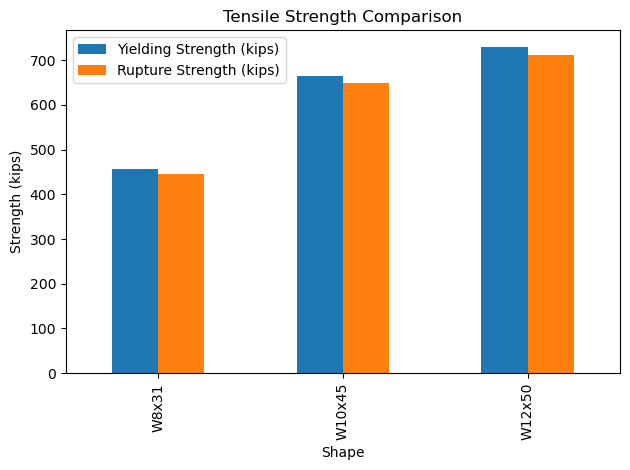

In [7]:
plt.figure(figsize=(10, 5))
results.plot(x='Shape', y=['Yielding Strength (kips)', 'Rupture Strength (kips)'], 
             kind='bar', title='Tensile Strength Comparison')
plt.ylabel('Strength (kips)')
plt.tight_layout()
plt.savefig('strength_comparison.png')
plt.show()


### Scatter Plot of Area vs Depth

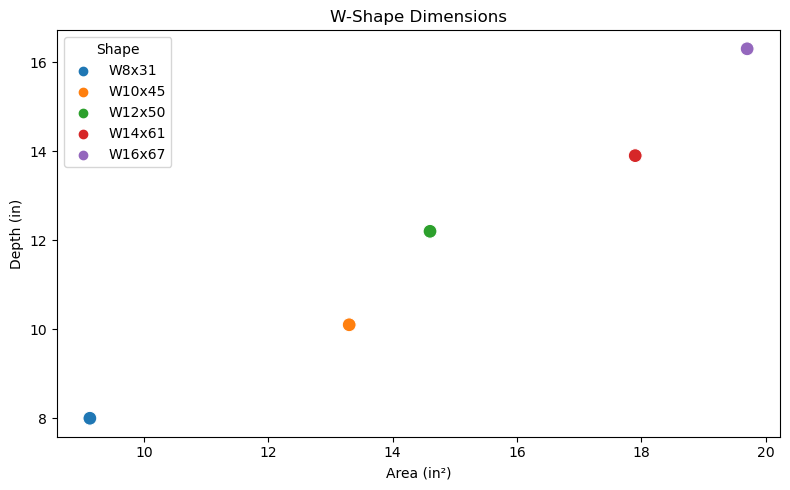

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=w_shapes, x='Area (in²)', y='Depth (in)', hue='Shape', s=100)
plt.title('W-Shape Dimensions')
plt.tight_layout()
plt.savefig('shape_dimensions.png')
plt.show()

### Three Different Comparison Scenarios

In [8]:
print("\nScenario 1: Default material properties (Fy=50, Fu=65)")
print(compare_shapes(shapes_to_compare))

print("\nScenario 2: Higher strength steel (Fy=60, Fu=75)")
print(compare_shapes(shapes_to_compare, Fy=60, Fu=75))

print("\nScenario 3: Lower strength steel (Fy=36, Fu=58)")
print(compare_shapes(shapes_to_compare, Fy=36, Fu=58))


Scenario 1: Default material properties (Fy=50, Fu=65)
    Shape  Yielding Strength (kips)  Rupture Strength (kips)
0   W8x31                     456.5                   445.09
1  W10x45                     665.0                   648.38
2  W12x50                     730.0                   711.75

Scenario 2: Higher strength steel (Fy=60, Fu=75)
    Shape  Yielding Strength (kips)  Rupture Strength (kips)
0   W8x31                     547.8                   513.56
1  W10x45                     798.0                   748.12
2  W12x50                     876.0                   821.25

Scenario 3: Lower strength steel (Fy=36, Fu=58)
    Shape  Yielding Strength (kips)  Rupture Strength (kips)
0   W8x31                    328.68                   397.16
1  W10x45                    478.80                   578.55
2  W12x50                    525.60                   635.10


users